# Analyse Experiment - Prepare Mseed Files

Read Data and write to mseed files 

In [20]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
config = {}

In [22]:
config['datapath_femto'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/femto/"

config['outpath_mseed'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/mseed/"

config['datapath_pressure'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/pressure/"

## Experiment Configurations

Experiment 6 - Valve open

In [46]:
config['outname_mseed'] = "experiment0"

config['filename_femto'] = "experiment0/munki1_241_242_243_css.wfdisc"
config['filename_pressure'] = "DATA0.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-19 15:30") + 7*3600  ## convert to UTC
config['tbeg'] = obs.UTCDateTime("2022-08-30 17:00") + 7*3600  ## convert to UTC
config['tend'] = obs.UTCDateTime("2022-08-31 09:00") + 7*3600  ## convert to UTC

In [47]:
# config['outname_mseed'] = "experiment1"

# config['filename_femto'] = "experiment2/munki1.263.264.css.wfdisc"
# config['filename_pressure'] = "DATA1.txt"

# # config['tbeg'] = obs.UTCDateTime("2022-09-19 15:30") + 7*3600  ## convert to UTC
# config['tbeg'] = obs.UTCDateTime("2022-09-19 16:30") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-19 18:30") + 7*3600  ## convert to UTC

In [48]:
# config['outname_mseed'] = "experiment2"

# config['filename_femto'] = "experiment2/munki1.263.264.css.wfdisc"
# config['filename_pressure'] = "DATA2.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-19 18:50") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-20 10:14") + 7*3600  ## convert to UTC

In [49]:
# config['outname_mseed'] = "experiment3"

# config['filename_femto'] = "experiment2/munki1.263.264.css.wfdisc"
# config['filename_pressure'] = "DATA3.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-20 10:20") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-20 19:20") + 7*3600  ## convert to UTC

In [50]:
# config['outname_mseed'] = "experiment4"

# config['filename_femto'] = "experiment2/munki1.263.264.css.wfdisc"
# config['filename_pressure'] = "DATA4.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-20 19:30") + 7*3600  ## convert to UTC
# # config['tend'] = obs.UTCDateTime("2022-09-22 10:15") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-21 02:15") + 7*3600  ## convert to UTC

In [51]:
# config['outname_mseed'] = "experiment6"

# config['filename_femto'] = "experiment6/munki1_269_css.wfdisc"
# config['filename_pressure'] = "DATA6.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-26 11:35") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-26 13:35") + 7*3600  ## convert to UTC

In [52]:
# config['outname_mseed'] = "experiment7"

# config['filename_femto'] = "experiment6/munki1_269_css.wfdisc"
# config['filename_pressure'] = "DATA7.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-26 13:45") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-26 15:15") + 7*3600  ## convert to UTC

In [53]:
# config['outname_mseed'] = "experiment8"

# config['filename_femto'] = "experiment8/munki1_271_css.wfdisc"
# config['filename_pressure'] = "DATA8.txt"

# ## alternative starttime due to missing data
# # config['tbeg'] = obs.UTCDateTime("2022-09-26 16:40") + 7*3600  ## convert to UTC
# config['tbeg'] = obs.UTCDateTime("2022-09-28 00:00") + 7*3600  ## convert to UTC 
# config['tend'] = obs.UTCDateTime("2022-09-28 09:30") + 7*3600  ## convert to UTC

In [54]:
# config['outname_mseed'] = "experiment9"

# config['filename_femto'] = "experiment9/munki1_272_css.wfdisc"
# config['filename_pressure'] = "DATA9.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-28 09:50") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-28 11:30") + 7*3600  ## convert to UTC

In [55]:
# config['outname_mseed'] = "experiment10"

# config['filename_femto'] = "experiment9/munki1_272_css.wfdisc"
# config['filename_pressure'] = "DATA10.txt"

# config['tbeg'] = obs.UTCDateTime("2022-09-28 11:40") + 7*3600  ## convert to UTC
# config['tend'] = obs.UTCDateTime("2022-09-28 18:00") + 7*3600  ## convert to UTC

## Load Femto Data

1 Trace(s) in Stream:
.munki1..p1s32 | 2022-08-29T23:58:49.210440Z - 2022-08-31T18:24:49.460440Z | 20.0 Hz, 3055206 samples


/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/trace.py:220: UserWarning: Calibration factor set to 0.0!
  warnings.warn(msg, UserWarning)


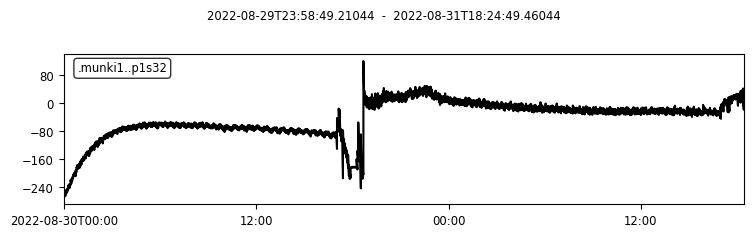

In [56]:
## read data stream using obspy routine
st = obs.read(config['datapath_femto']+config['filename_femto'], format="CSS")

## merge traces that might be split due to data gaps or overlaps
st.merge(fill_value="interpolate")

## setting the calibration variable if not already set
st[0].stats.calib = 1.0

## show all traces in data stream
print(st)

st.plot(equal_scale=False);

## Load Pressure Data

In [57]:
if os.path.isfile(config['datapath_pressure']+config['filename_pressure']):
    ## read data of parascientific barometer
    pressure = pd.read_csv(config['datapath_pressure']+config['filename_pressure'], names=["timestamp","pressure"])

    ## convert timestamp to datetime objects
    pressure['timestamp'] = pd.to_datetime(pressure.timestamp)

    ## make local time to UTC (+7 hours)
    pressure['timestamp'] += pd.to_timedelta(7, unit='h')

    ## resample with df=1sec
    pressure = pressure.resample("1S", on="timestamp").mean().reset_index()

    pressure.head()

-> no pressure trace added!
.BARO..XXX | 2022-08-29T23:58:49.210440Z - 2022-10-04T08:38:54.210440Z | 1.0 Hz, 3055206 samples


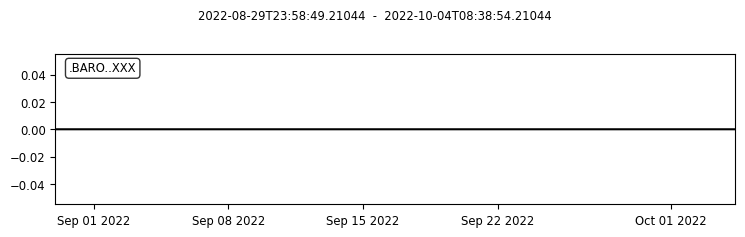

In [58]:
pressure_trace = obs.Trace()

pressure_trace.stats.delta = 1.0
pressure_trace.stats.station = "BARO"
pressure_trace.stats.channel = "XXX"

try:
    pressure_trace.data = np.array(pressure.pressure)
    pressure_trace.stats.starttime = obs.UTCDateTime(pressure.timestamp[0])
except:
    pressure_trace.data = np.zeros(len(st[0].data))
    pressure_trace.stats.starttime = st[0].stats.starttime
    print("-> no pressure trace added!")

print(pressure_trace)

pressure_trace.plot();

## Join Streams, Trim and Write Output

In [59]:
st2 = st.copy()

## add pressure trace
st2 += pressure_trace

## cut to experiment times
st2.trim(config['tbeg'], config['tend'])

## write to mseed files
st2.write(config['outpath_mseed']+config['outname_mseed']+".mseed", format="MSEED")

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/io/mseed/core.py:838: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


## Plotting

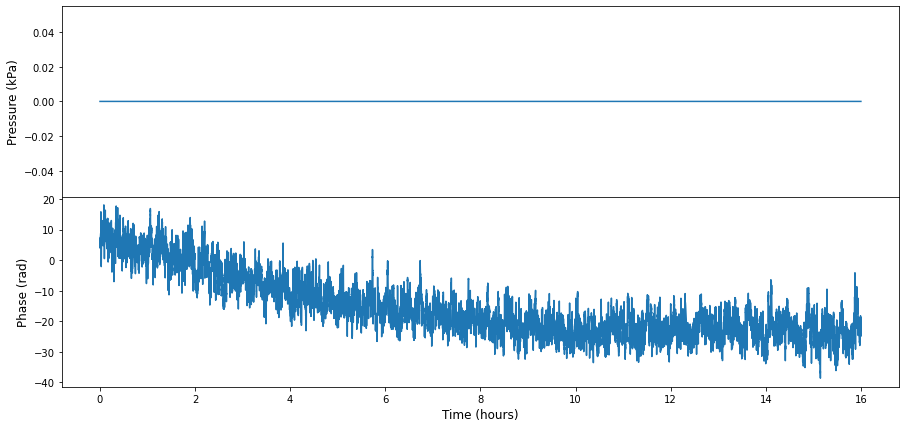

In [60]:
def __make_plot_traces():

    fig, ax = plt.subplots(2,1, figsize=(15,7), sharex=True)

    fig.subplots_adjust(hspace=0)

    ax[0].plot(st2.select(station="BARO")[0].times()/3600, st2.select(station="BARO")[0].data)
    ax[1].plot(st2.select(station="munki1")[0].times()/3600, st2.select(station="munki1")[0].data)

    plt.xlabel("Time (hours)", fontsize=12)
    ax[0].set_ylabel("Pressure (kPa)", fontsize=12)
    ax[1].set_ylabel("Phase (rad)", fontsize=12)

__make_plot_traces()